In [86]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn import preprocessing
from scipy.stats import skew
from scipy.stats import boxcox
from sklearn.ensemble import RandomForestClassifier 
import seaborn as sns

%matplotlib inline


In [3]:
# https://www.prosper.com/welcome/fee_history.aspx
# prosper makes money from the closing fee upfront from borrower (BorrowerRate - LenderYield) * LoanAmount 
# and the servicing fee from the lender (LP_ServiceFees)
# late fee from the borrower is passed onto the lender 
# collection fee from the agency is passed onto the lender

In [4]:
df = pd.read_csv("prosperLoanData.csv") #Reading the dataset in a dataframe using Pandas

In [5]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
df.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

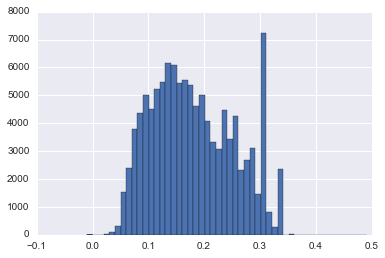

In [9]:
#df['LenderYield'].value_counts()
#df.LenderYield.hist(bins=50)
df['LenderYield'].hist(bins=50)

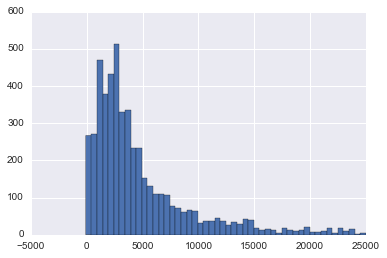

In [10]:
defaulted = df[df['LoanStatus']=='Defaulted']
#defaulted['LenderYield'].hist(bins=50)
defaulted['LP_GrossPrincipalLoss'].hist(bins=50)

In [11]:
df['LP_InterestandFees'].describe() #looks like there are negative fees

count    113937.000000
mean       1077.542901
std        1183.414168
min          -2.349900
25%         274.870000
50%         700.840100
75%        1458.540000
max       15617.030000
Name: LP_InterestandFees, dtype: float64

In [12]:
df[df['LP_InterestandFees'] < 0].transpose() # examine negative fee loans

,28384,91184
ListingKey,34CD3587284005601C13ED3,5FB33596391582382D26742
ListingNumber,880346,1049521
ListingCreationDate,2013-08-26 13:29:03.487000000,2013-12-11 18:13:10.023000000
CreditGrade,NaN,NaN
Term,36,36
LoanStatus,Chargedoff,Completed
ClosedDate,2014-01-28 00:00:00,2013-12-18 00:00:00
BorrowerAPR,0.32538,0.19859
BorrowerRate,0.2859,0.162
LenderYield,0.2759,0.152


In [13]:
df.loc[df['LP_InterestandFees'] <0, ['LP_InterestandFees']] = 0  #set 2 loans with negative fees to 0

In [14]:
df[df['LP_InterestandFees']==0]['LP_InterestandFees'].count() #6223 loans made zero fees + 2 we adjusted

6225

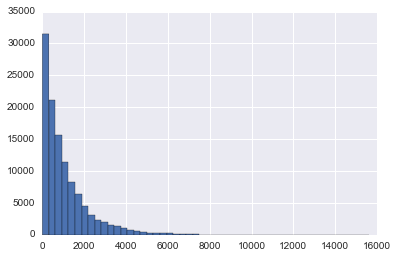

In [15]:
df['LP_InterestandFees'].hist(bins=50)  # heavy positive skew 

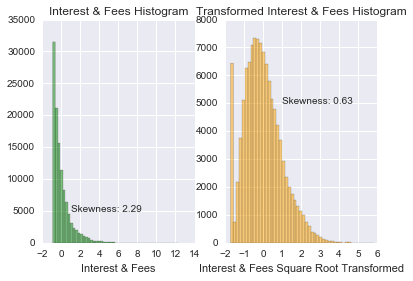

In [16]:
#calculate the skewness
Fees = preprocessing.scale(df['LP_InterestandFees'])
FeesScaled = preprocessing.scale(np.sqrt(df['LP_InterestandFees']))
skew1 = skew(Fees)
skew2 = skew(FeesScaled)

#draw it
figure = plt.figure()
figure.add_subplot(121)
plt.hist(Fees, facecolor='green', alpha = .5, bins=50)
plt.xlabel("Interest & Fees") 
plt.title("Interest & Fees Histogram") 
plt.text(1,5000,"Skewness: {0:.2f}".format(skew1)) 

figure.add_subplot(122)
plt.hist(FeesScaled, facecolor='orange', alpha =.5, bins=50)
plt.xlabel("Interest & Fees Square Root Transformed") 
plt.title("Transformed Interest & Fees Histogram") 
plt.text(1,5000,"Skewness: {0:.2f}".format(skew2))
plt.show()

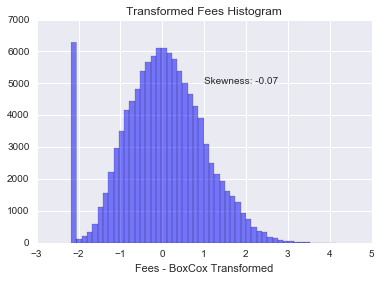

In [87]:
#tried boxcox transformation and received the best results. skewness of -0.07
#https://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html

FeesBoxCox= preprocessing.scale(boxcox(df['LP_InterestandFees']+1)[0])
skew3 = skew(FeesBoxCox)
   
plt.hist(FeesBoxCox,facecolor='blue',  alpha = .5, bins=50) 
plt.xlabel("Fees - BoxCox Transformed") 
plt.title("Transformed Fees Histogram") 
plt.text(1,5000,"Skewness: {0:.2f}".format(skew3)) 
plt.show()

# good thing random forests do not require normality

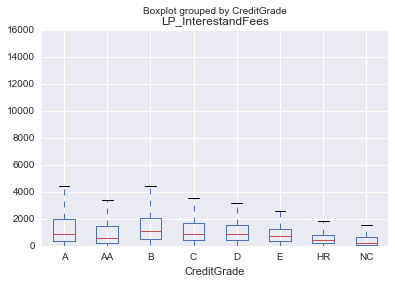

In [18]:
#credit grade available until July 2009. not all values are filled in 
df.boxplot(column='LP_InterestandFees', by ='CreditGrade')

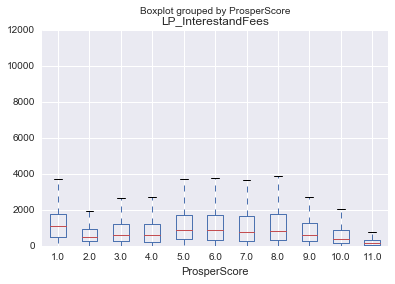

In [19]:
#prosper score only available from July 2009 onward. all values are filled
df.boxplot(column='LP_InterestandFees', by ='ProsperScore')

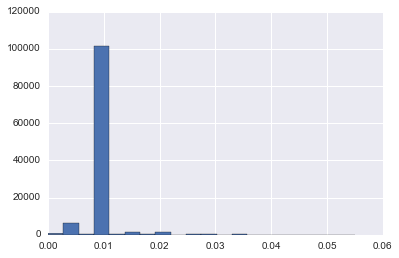

In [20]:
df['ClosingFeePercent'] = df['BorrowerRate'] - df['LenderYield']
df['ClosingFeePercent'].hist(bins=20)

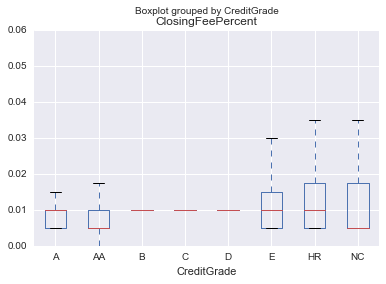

In [21]:
df['ClosingFeeDollar'] = df['ClosingFeePercent'] * df['LoanOriginalAmount']
df.boxplot(column='ClosingFeePercent', by ='CreditGrade')

In [22]:
df['LoanOriginationDate'] =  pd.to_datetime(df['LoanOriginationDate'], format='%Y-%m-%d %H:%M:%S')

In [23]:
df['Year'] = pd.DatetimeIndex(df['LoanOriginationDate']).year

In [24]:
df['TotalFeeDollar'] = df['ClosingFeeDollar'] - df['LP_ServiceFees']
#revenue = df[['TotalFeeDollar']]
keep = ['TotalFeeDollar', 'LoanOriginationDate', 'Year', 'CreditGrade', 'ProsperScore',\
        'ListingCategory (numeric)','BorrowerState','LoanStatus']
revenue = df[keep]

In [25]:
revenue.head()

,TotalFeeDollar,LoanOriginationDate,Year,CreditGrade,ProsperScore,ListingCategory (numeric),BorrowerState,LoanStatus
0,321.680,2007-09-12,2007,C,NaN,0,CO,Completed
1,100.000,2014-03-03,2014,NaN,7.0,2,CO,Current
2,129.235,2007-01-17,2007,HR,NaN,0,GA,Completed
3,208.010,2012-11-01,2012,NaN,9.0,16,GA,Current
4,210.270,2013-09-20,2013,NaN,4.0,2,MN,Current


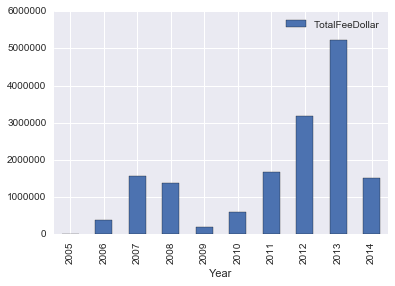

In [26]:
revenue[['TotalFeeDollar', 'Year']].groupby('Year').sum().plot(kind='bar')

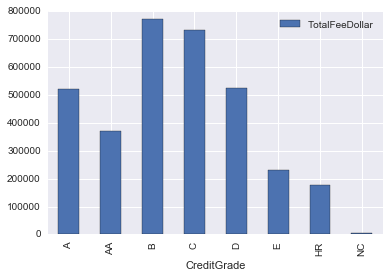

In [27]:
revenue[['TotalFeeDollar', 'CreditGrade']].groupby('CreditGrade').sum().plot(kind='bar')

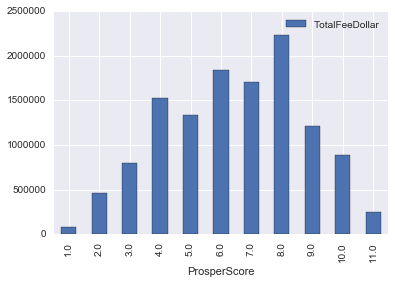

In [28]:
revenue[['TotalFeeDollar', 'ProsperScore']].groupby('ProsperScore').sum().plot(kind='bar')

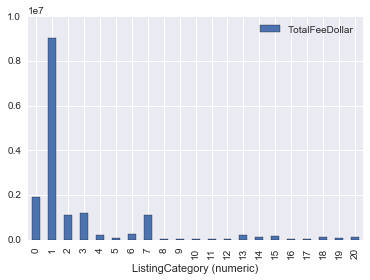

In [29]:
revenue[['TotalFeeDollar', 'ListingCategory (numeric)']].groupby('ListingCategory (numeric)').sum().plot(kind='bar')

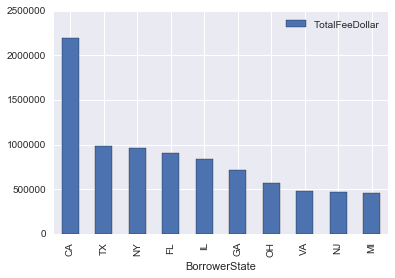

In [30]:
state = revenue[['TotalFeeDollar', 'BorrowerState']].groupby('BorrowerState').sum()
state = state.sort_values(by='TotalFeeDollar', ascending=False) #sorted by revenues
state.head(10).plot(kind='bar') #plot top 10

In [31]:
state2 = revenue.pivot_table(index=['BorrowerState'],values=["TotalFeeDollar"],aggfunc=[np.sum,len], fill_value=0,margins=True)
stackedstate = state2.stack(1).sort_values(by='sum',ascending=False)
stackedstate['FeePerLoan'] = stackedstate['sum']/stackedstate['len']

In [32]:
stackedstate.sort_values(by='FeePerLoan',ascending=False).head(5)
#seems that loans from DC makes the most in fees

,,sum,len,FeePerLoan
BorrowerState,,,,
DC,TotalFeeDollar,66773.0700,382.0,174.798613
MD,TotalFeeDollar,434112.6725,2821.0,153.886094
NH,TotalFeeDollar,84668.0437,551.0,153.662511
MA,TotalFeeDollar,344026.9588,2242.0,153.446458
NJ,TotalFeeDollar,472115.0875,3097.0,152.442715


In [33]:
report = df.pivot_table(values=['ProsperScore'],index=['BorrowerState'], fill_value=0, aggfunc=np.mean)
report.sort_values(by='ProsperScore',ascending=False).head(5) 
#top average prosper score, hypothesize was right DC loans were most credit worthy

,ProsperScore
BorrowerState,
DC,6.786585
IL,6.236867
DE,6.205993
MA,6.180776
GA,6.126382


In [34]:
#gross principal losses by vintage(origination date) and prosper credit score.
df.pivot_table(values=['LP_GrossPrincipalLoss'],index=['Year'],columns=['ProsperScore'], fill_value=0, aggfunc=np.sum)


LP_GrossPrincipalLoss                                            \
ProsperScore                  1.0         2.0         3.0      4.0      5.0    
Year                                                                           
2009                      27879.54     2801.83    11581.32    91549   109294   
2010                      81004.43    61217.99    57413.27   147348   368864   
2011                     497830.93   499044.04   499014.50  1606301  1846459   
2012                     402861.03  1007652.65  1120123.39  1535412  2428590   
2013                       3638.36   414156.56   502092.80   464155   393766   
2014                          0.00        0.00        0.00        0        0   

                                                                 
ProsperScore     6.0      7.0      8.0     9.0        10.0 11.0  
Year                                                             
2009            94648   147233   191421  148390   23667.69    0  
2010           482449   444337   514238  348735   94885.25    0  
2011          1865715  1088931  1568172  537051  118252.22    0  
2012          3052017  2706721  2664818  820880  154914.19    0  
2013           267927   161089   105323   88527   41869.42    0  
2014                0        0        0       0       0.00    0

In [35]:
#this is where we begin to clean up the data, selecting features
#with the purpose of creating a model to predict bad loans


In [36]:
#check for missing values
#can conclude from variable definitions 29084 out of 113937 loans were made before July 2009
df.apply(lambda x: sum(x.isnull()),axis=0) 

ListingKey                              0
ListingNumber                           0
ListingCreationDate                     0
CreditGrade                         84984
Term                                    0
LoanStatus                              0
ClosedDate                          58848
BorrowerAPR                            25
BorrowerRate                            0
LenderYield                             0
EstimatedEffectiveYield             29084
EstimatedLoss                       29084
EstimatedReturn                     29084
ProsperRating (numeric)             29084
ProsperRating (Alpha)               29084
ProsperScore                        29084
ListingCategory (numeric)               0
BorrowerState                        5515
Occupation                           3588
EmploymentStatus                     2255
EmploymentStatusDuration             7625
IsBorrowerHomeowner                     0
CurrentlyInGroup                        0
GroupKey                          

In [37]:
#filter out loans without prosper score, basically older loans
scored = df[~df.ProsperScore.isnull()]

In [38]:
scored = scored[['Term','LoanStatus','ListingCreationDate','BorrowerAPR','ProsperScore', \
                 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentDelinquencies', \
                 'StatedMonthlyIncome','LoanOriginalAmount','LoanOriginationDate']]

In [39]:
scored.apply(lambda x: sum(x.isnull()),axis=0) 

Term                    0
LoanStatus              0
ListingCreationDate     0
BorrowerAPR             0
ProsperScore            0
EmploymentStatus        0
IsBorrowerHomeowner     0
CurrentDelinquencies    0
StatedMonthlyIncome     0
LoanOriginalAmount      0
LoanOriginationDate     0
dtype: int64

In [40]:
scored.dtypes

Term                             int64
LoanStatus                      object
ListingCreationDate             object
BorrowerAPR                    float64
ProsperScore                   float64
EmploymentStatus                object
IsBorrowerHomeowner               bool
CurrentDelinquencies           float64
StatedMonthlyIncome            float64
LoanOriginalAmount               int64
LoanOriginationDate     datetime64[ns]
dtype: object

In [41]:
#Simplify loanstatuses  Cancelled Completed Current FinalPaymentInProgress = 0
scored.pivot_table(values=['Term'],index=['LoanStatus'], fill_value=0, aggfunc=len)


,Term
LoanStatus,
Chargedoff,5336
Completed,19664
Current,56576
Defaulted,1005
FinalPaymentInProgress,205
Past Due (1-15 days),806
Past Due (16-30 days),265
Past Due (31-60 days),363
Past Due (61-90 days),313


In [42]:
#scored['LoanStatus'].map(lambda x: 0 if x=='Cancelled' else 1).astype(int)
def isBadLoan(status):
    if any([status == 'Cancelled', status == 'Completed' , \
           status == 'Current', status == 'FinalPaymentInProgress']):
        return 0
    else:
        return 1


In [43]:
scored['isBadLoan'] = scored['LoanStatus'].apply(isBadLoan)
scored.pivot_table(values=['Term'],index=['isBadLoan'], fill_value=0, aggfunc=len)


,Term
isBadLoan,
0,76445
1,8408


In [44]:
#Create originationtime variable: # of days from listing to funded
scored['ListingCreationDate'] = pd.to_datetime(scored['ListingCreationDate'])
scored['OriginationTime'] = (scored['LoanOriginationDate'] - scored['ListingCreationDate']).dt.days
scored.head(5)

,Term,LoanStatus,ListingCreationDate,BorrowerAPR,ProsperScore,EmploymentStatus,IsBorrowerHomeowner,CurrentDelinquencies,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,isBadLoan,OriginationTime
1,36,Current,2014-02-27 08:28:07.900,0.12016,7.0,Employed,False,0.0,6125.000000,10000,2014-03-03,0,3
3,36,Current,2012-10-22 11:02:35.010,0.12528,9.0,Employed,True,4.0,2875.000000,10000,2012-11-01,0,9
4,36,Current,2013-09-14 18:38:39.097,0.24614,4.0,Employed,True,0.0,9583.333333,15000,2013-09-20,0,5
5,60,Current,2013-12-14 08:26:37.093,0.15425,10.0,Employed,True,0.0,8333.333333,15000,2013-12-24,0,9
6,36,Current,2013-04-12 09:52:56.147,0.31032,2.0,Employed,False,0.0,2083.333333,3000,2013-04-18,0,5


In [45]:
#Fix employment status
scored.pivot_table(values=['Term'],index=['EmploymentStatus'], fill_value=0, aggfunc=len)


,Term
EmploymentStatus,
Employed,67310
Full-time,7927
Not employed,649
Other,3806
Part-time,256
Retired,367
Self-employed,4538


In [46]:
scored.dtypes


Term                             int64
LoanStatus                      object
ListingCreationDate     datetime64[ns]
BorrowerAPR                    float64
ProsperScore                   float64
EmploymentStatus                object
IsBorrowerHomeowner               bool
CurrentDelinquencies           float64
StatedMonthlyIncome            float64
LoanOriginalAmount               int64
LoanOriginationDate     datetime64[ns]
isBadLoan                        int64
OriginationTime                  int64
dtype: object

In [47]:
scored = scored.drop(['LoanStatus', 'ListingCreationDate','EmploymentStatus','LoanOriginationDate'], axis=1)


In [48]:
scored.dtypes


Term                      int64
BorrowerAPR             float64
ProsperScore            float64
IsBorrowerHomeowner        bool
CurrentDelinquencies    float64
StatedMonthlyIncome     float64
LoanOriginalAmount        int64
isBadLoan                 int64
OriginationTime           int64
dtype: object

In [49]:
scored = scored[['isBadLoan', 'OriginationTime','Term',\
 'BorrowerAPR', 'ProsperScore', 'IsBorrowerHomeowner',\
 'CurrentDelinquencies', 'StatedMonthlyIncome', 'LoanOriginalAmount']]
scored.dtypes

isBadLoan                 int64
OriginationTime           int64
Term                      int64
BorrowerAPR             float64
ProsperScore            float64
IsBorrowerHomeowner        bool
CurrentDelinquencies    float64
StatedMonthlyIncome     float64
LoanOriginalAmount        int64
dtype: object

In [55]:
# train on 75% of random data points
#scored['is_train'] = np.random.uniform(0, 1, len(scored)) <= .75
#train, test = scored[scored['is_train']==True], scored[scored['is_train']==False]
#features = scored.columns[1:9] #skip first and last column
clf = RandomForestClassifier(n_estimators=100)

from sklearn.cross_validation import train_test_split
features = scored.columns[1:9] #skip first column


In [107]:
# Training data features converted to numpy
train_features = scored[features].values
train_target = scored['isBadLoan'].values

# Fit the model to our training data
#clf = clf.fit(train_features, train_target)
#score = clf.score(train_features, train_target)
#"Mean accuracy of Random Forest: {0}".format(score)

# Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.20, 
                                                    random_state=0)
#print (train_features.shape, train_target.shape)
#print (train_x.shape, train_y.shape)
#print (test_x.shape, test_y.shape)

#fit the model and score it using test data
clf = clf.fit(train_x, train_y)
clf.score(test_x, test_y)


0.89287608272936181

In [57]:
predict_y = clf.predict(test_x)

from sklearn.metrics import accuracy_score
print ("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Accuracy = 0.89


In [77]:
test_y.cumsum() #there are 1732 bad loans in test data set

array([   1,    1,    1, ..., 1732, 1732, 1732], dtype=int64)

In [58]:
model_score = clf.score(test_x, test_y)
print ("Model Score %.2f \n" % (model_score))

Model Score 0.89 



In [60]:
from sklearn import metrics


In [67]:
#https://notmatthancock.github.io/2015/10/28/confusion-matrix.html

def show_confusion_matrix(C,class_labels=['0','1']):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, etc...
    tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap=plt.cm.gray)

    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True Label', fontsize=16, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)


    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d\n(Num Neg: %d)'%(tn,NN),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'False Neg: %d'%fn,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,0,
            'False Pos: %d'%fp,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    ax.text(1,1,
            'True Pos: %d\n(Num Pos: %d)'%(tp,NP),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'False Pos Rate: %.2f'%(fp / (fp+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,1,
            'True Pos Rate: %.2f'%(tp / (tp+fn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%((tp+tn+0.)/N),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Neg Pre Val: %.2f'%(1-fn/(fn+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val: %.2f'%(tp/(tp+fp+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    plt.tight_layout()
    plt.show()


In [69]:
confusion_matrix = metrics.confusion_matrix(test_y, predict_y)

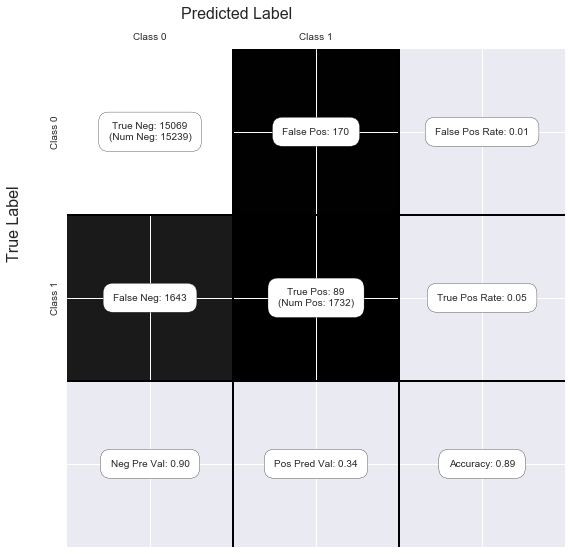

In [68]:
show_confusion_matrix(confusion_matrix, ['Class 0', 'Class 1'])

In [115]:
# Really bad at predicting bad loans. Out of 1732 bad loans, 89 were predicted to be bad by Random Forest.
